# Session 3 - Training a Network w/ TF

In [1]:
# imports

# check py ver
import sys
if sys.version_info < (3,4):
    print('This version of Python is too old. Please update to at least 3.4.')

# libs
try:
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    from skimage.transform import resize
    from skimage import data
    from scipy.misc import imresize
except ImportError:
    print('You are missing some libraies!')
    # wild - we can `pip install` here!
    #!pip install "numpy>1.11.0" "matplotlib>1.5.1" "scikit-image>0.11.3" "scikit-learn>=0.17" "scipy>=0.17.0"
    
# tf
try:
    import tensorflow as tf
except ImportError:
    print('You need TensorFlow for this course about artistic applications of TensorFlow.')
    
try:
    from libs import utils, gif
    import IPython.display as ipyd
except ImportError:
    print('Make sure you have the libs stuff in the same directory as this notebook.')

In [2]:
# pk doesn't like the default inline code style, so let's jazz up the CSS:
from IPython.core.display import HTML
HTML("""<style> .rendered_html code {
    padding: 2px 4px;
    color: #c7254e;
    background-color: #f9f2f4;
    border-radius: 4px;
}</style>""")

In [3]:
%matplotlib inline
plt.style.use('ggplot')

## Part One - Fully Connected Network

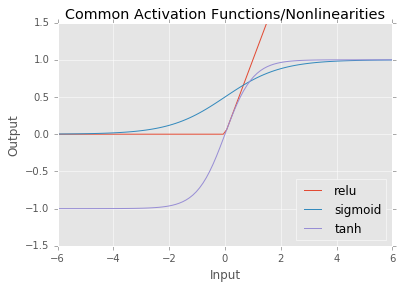

In [4]:
xs = np.linspace(-6, 6, 100)
plt.plot(xs, np.maximum(xs, 0), label='relu')
plt.plot(xs, 1 / (1 + np.exp(-xs)), label='sigmoid')
plt.plot(xs, np.tanh(xs), label='tanh')
plt.xlabel('Input')
plt.xlim([-6, 6])
plt.ylabel('Output')
plt.ylim([-1.5, 1.5])
plt.title('Common Activation Functions/Nonlinearities')
plt.legend(loc='lower right')

### Code

In [5]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')

In [6]:
W = tf.get_variable('W', shape=[2, 20], dtype=tf.float32,
                    initializer=tf.random_normal_initializer(mean=0, stddev=0.01, dtype=tf.float32))
b = tf.get_variable('b', shape=[20], dtype=tf.float32,
                    initializer=tf.constant_initializer(value=0.0, dtype=tf.float32))

In [7]:
#wx_plus_b = tf.matmul(X, W) + b

In [8]:
h = tf.matmul(X, W)

In [9]:
h = tf.nn.bias_add(h, b)

In [10]:
#help(tf.get_variable)
#help(tf.random_normal_initializer)
#help(tf.constant_initializer)
#help(tf.nn.bias_add)
help(tf.nn.relu)

Help on function relu in module tensorflow.python.ops.gen_nn_ops:

relu(features, name=None)
    Computes rectified linear: `max(features, 0)`.
    
    Args:
      features: A `Tensor`. Must be one of the following types: `float32`, `float64`, `int32`, `int64`, `uint8`, `int16`, `int8`, `uint16`, `half`.
      name: A name for the operation (optional).
    
    Returns:
      A `Tensor`. Has the same type as `features`.



In [11]:
h = tf.nn.relu(h)

Next we get `linear` from the `utils` we imported... Let's copy it instead of using it directly so we can type it out and "enjoy" the contents:

In [12]:
# scope is called 'name', number of inputs is derived from the shape of `x`
def linear(x, n_output, name=None, activation=None, reuse=None):
    if len(x.get_shape()) != 2:
        x = flatten(x, reuse=reuse)
    n_input = x.get_shape().as_list()[1]
    with tf.variable_scope(name or "fc", reuse=reuse):
        W = tf.get_variable(name='W',
                           shape=[n_input, n_output],
                           dtype=tf.float32,
                           initializer=tf.contrib.layers.xavier_initializer())
        b = tf.get_variable(name='b',
                           shape=[n_output],
                           dtype=tf.float32,
                           initializer=tf.constant_initializer(0.0))
        h = tf.nn.bias_add(name='h',
                          value=tf.matmul(x, W),
                          bias=b)
        if activation:
            h = activation(h)
        return h, W

### Variable scopes

Note that since we are using `variable_scope` and telling the scope the name we would like, if there is _already_ a variable with the same name, TF will raise an exception. Consider three possible solutions:

1. reset the current graph: `tf.reset_default_graph()`
2. look for typos
3. use context managers when creating graphs and running sessions, e.g.

```
g = tf.Graph()
with tf.Session(graph=g) as sess:
    Y_pred, W = linear(X, 2, 'linear', activation=tf.nn.relu)
```

or

```
g = tf.Graph()   # ? why do this and add `g.as_default()` below?
with tf.Session(graph=g) as sess, g.as_default():
    Y_pred, W = linear(X, 2, 'linear', activation=tf.nn.relu)

```

In [13]:
h, W = linear(x=X, n_output=20, name='linear', activation=tf.nn.relu)

## Part Two - Imagine painting network

In [16]:
dirname = "/Users/perdue/Dropbox/ArtificialIntelligence/CADL/CADL/session-1/imgs"
filenames = [os.path.join(dirname, fname) for fname in os.listdir(dirname)]
imgs = [plt.imread(fname) for fname in filenames]
imgs = np.array(imgs).astype(np.float32)

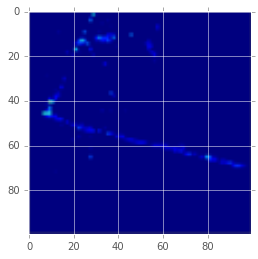

In [18]:
# trim off white edges
imgs = [img_i[11:88, 13:90] for img_i in imgs]
imgs = [resize(img_i, (100, 100)) for img_i in imgs]
imgs = np.array(imgs).astype(np.float32)
plt.imshow(imgs[0])

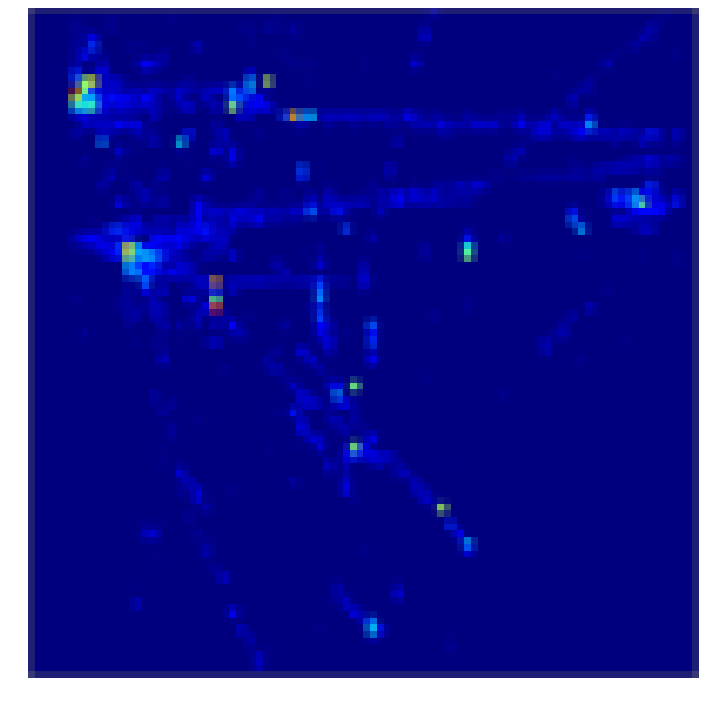

In [22]:
fig = plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.axis('off')
im = ax.imshow(imgs[49], interpolation='nearest')

In [23]:
for i in range(len(imgs)):
    fig = plt.figure(figsize=(1, 1))
    ax = plt.gca()
    ax.axis('off')
    im = ax.imshow(imgs[i], cmap=plt.get_cmap('jet'),
                   interpolation='nearest', vmin=0, vmax=1)
    figname = 'imgs/kadenze_%04d.png' % i
    plt.savefig(figname)
    plt.close()

In [24]:
dirname = "/Users/perdue/Dropbox/ArtificialIntelligence/CADL/CADL/session-2/imgs"
filenames = [os.path.join(dirname, fname) for fname in os.listdir(dirname)]
imgs = [plt.imread(fname) for fname in filenames]
imgs = np.array(imgs).astype(np.float32)

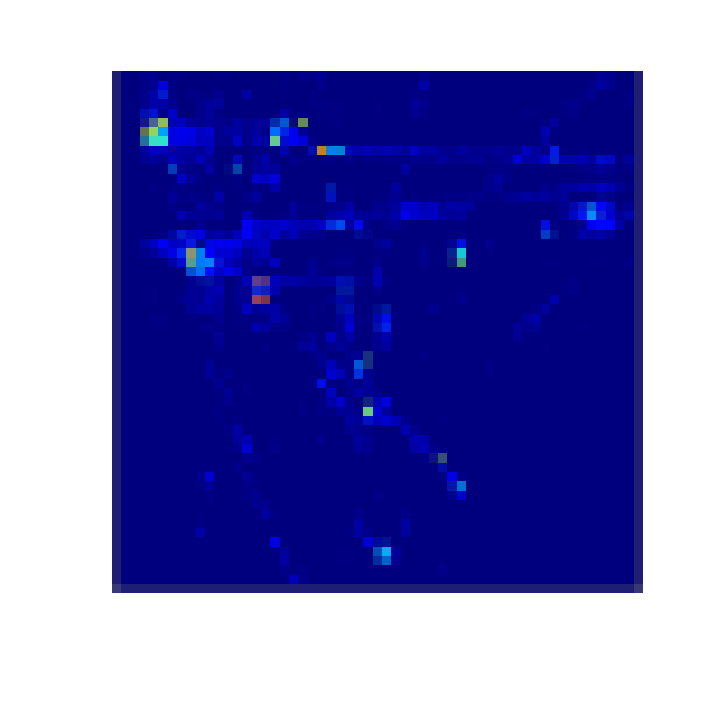

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.axis('off')
im = ax.imshow(imgs[49], interpolation='nearest')

We again pick up the dumb white borders!

Should just read the image data properly from the HDF5 file... use `npymaker.py`

In [26]:
imgs = np.load('img_data.npy')
print(imgs.shape)

(100, 100, 100)


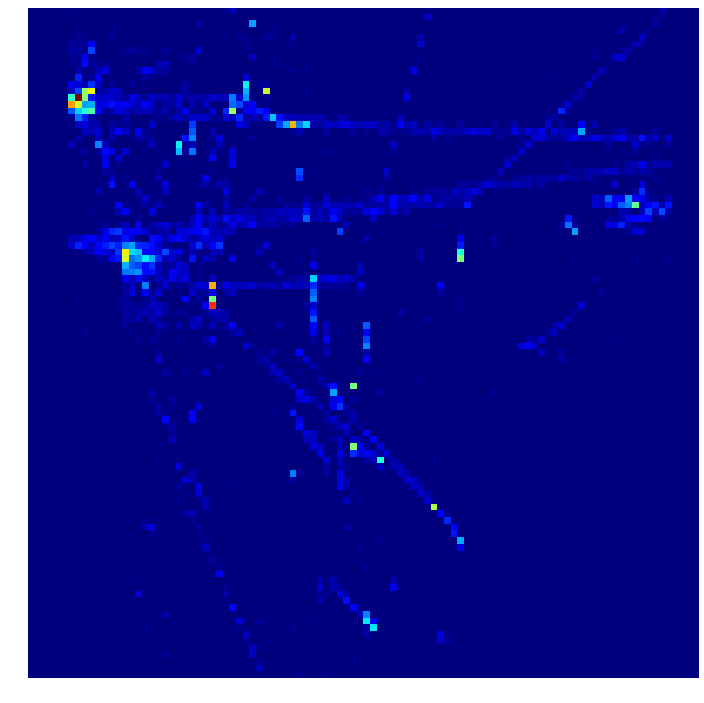

In [27]:
fig = plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.axis('off')
im = ax.imshow(imgs[49], interpolation='nearest')